<a href="https://colab.research.google.com/github/Ahngyuho/DeepLearning/blob/main/DeepLearning_Study_MovileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Colab 시작 페이지</h1>

Colab에 이미 익숙하다면 이 동영상을 통해 양방향 테이블, 코드 실행 기록 보기, 명령어 팔레트에 관해 알아보세요.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  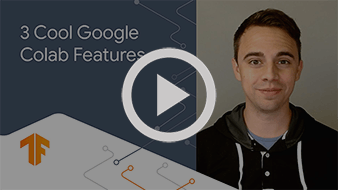
  </a>
</center>

In [ ]:
import os
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.mkdir('/content/Dataset')
os.mkdir ('/content/Dataset/paper')

In [ ]:
cd '/content/Dataset/paper'

/content/Dataset/paper


In [ ]:
!unzip -qq "/content/gdrive/MyDrive/My Drive/paper.zip"

In [ ]:
cd '/content/Dataset'

/content/Dataset


In [ ]:
!unzip -qq "/content/gdrive/MyDrive/My Drive/scissors.zip"

In [ ]:
os.mkdir ('/content/Dataset/rock')

In [ ]:
cd '/content/Dataset/rock'

/content/Dataset/rock


In [ ]:
!unzip -qq "/content/gdrive/MyDrive/My Drive/rock.zip"

In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 224
batch_size = 1

train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=40,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   brightness_range=(0.5,1.3))

train_generator = train_datagen.flow_from_directory(directory="/content/Dataset",subset="training",batch_size=batch_size,shuffle=True,class_mode="categorical",
            target_size=(image_size,image_size))

Found 1500 images belonging to 3 classes.


In [ ]:
train_x=[]
train_y=[]

plt.figure(figsize=(6,6))

for i in range(train_generator.n):
  x,y = train_generator.next()
  x = np.squeeze(x,axis=0)
  train_x.append(x)
  y = np.squeeze(y,axis=0)
  train_y.append(y)

<Figure size 432x432 with 0 Axes>

In [ ]:
#plt.imshow(train_x[1])

train_x = np.array(train_x)
train_y = np.array(train_y)
train_x.shape
train_y.shape

(1500, 3)

In [ ]:
import numpy as np
from tensorflow.keras.applications import MobileNetV2
mobilev2 = MobileNetV2()

for layer in mobilev2.layers[:-1]:
  layer.trainable = True

for layer in mobilev2.layers[:-1]:
  if 'kernel' in layer.__dict__:
    kernel_shape = np.array(layer.get_weights()).shape
    layer.set_weights(tf.random.normal(kernel_shape,0,1))

14548992/14536120 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.applications import MobileNetV2
mobilev2 = MobileNetV2()

x = mobilev2.layers[-2].output
predictions = tf.keras.layers.Dense(3,activation='softmax')(x)
model = tf.keras.Model(inputs=mobilev2.input,outputs=predictions)

model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [ ]:
history = model.fit(train_x,train_y,epochs=10,validation_split=0.25,batch_size=8)

Epoch 1/10
141/141 [==============================] - 33s 141ms/step - loss: 0.4413 - accuracy: 0.8160 - val_loss: 1.3238 - val_accuracy: 0.6213
Epoch 2/10
141/141 [==============================] - 17s 121ms/step - loss: 0.1227 - accuracy: 0.9609 - val_loss: 1.6737 - val_accuracy: 0.6160
Epoch 3/10
141/141 [==============================] - 17s 120ms/step - loss: 0.1298 - accuracy: 0.9547 - val_loss: 0.3931 - val_accuracy: 0.8773
Epoch 4/10
141/141 [==============================] - 17s 118ms/step - loss: 0.0903 - accuracy: 0.9689 - val_loss: 0.3055 - val_accuracy: 0.9013
Epoch 5/10
141/141 [==============================] - 17s 119ms/step - loss: 0.0616 - accuracy: 0.9796 - val_loss: 0.1632 - val_accuracy: 0.9547
Epoch 6/10
141/141 [==============================] - 17s 121ms/step - loss: 0.0506 - accuracy: 0.9813 - val_loss: 0.1474 - val_accuracy: 0.9653
Epoch 7/10
141/141 [==============================] - 17s 121ms/step - loss: 0.0314 - accuracy: 0.9902 - val_loss: 0.1534 - val_ac

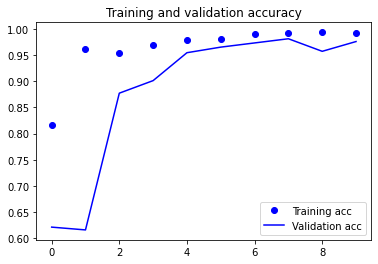

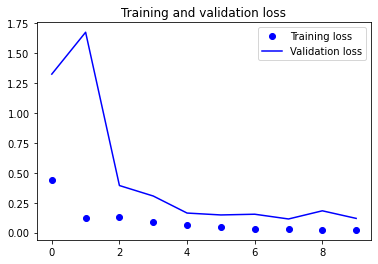

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

[0.98685986 0.00643627 0.0067039 ]


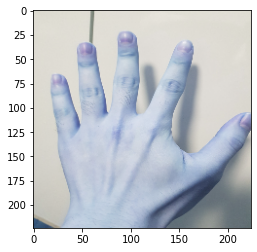

In [ ]:
import cv2
img = cv2.imread('/KakaoTalk_20220115_012512335.jpg')
img = cv2.resize(img,dsize=(224,224))
img = img / 255.0
plt.imshow(img)
img = np.expand_dims(img,axis=0)



prediction = model.predict(img)[0]
print(prediction)




<h1>Colab이란?</h1>

Colaboratory&#40;줄여서 'Colab'이라고 함&#41;을 통해 브라우저 내에서 Python 스크립트를 작성하고 실행할 수 있습니다. 
- 구성이 필요하지 않음
- GPU 무료 액세스
- 간편한 공유

<strong>학생</strong>이든, <strong>데이터 과학자</strong>든, <strong>AI 연구원</strong>이든 Colab으로 업무를 더욱 간편하게 처리할 수 있습니다. <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colab 소개 영상</a>에서 자세한 내용을 확인하거나 아래에서 시작해 보세요.

## <strong>시작하기</strong>

지금 읽고 계신 문서는 정적 웹페이지가 아니라 코드를 작성하고 실행할 수 있는 대화형 환경인 <strong>Colab 메모장</strong>입니다.

예를 들어 다음은 값을 계산하여 변수로 저장하고 결과를 출력하는 간단한 Python 스크립트가 포함된 <strong>코드 셀</strong>입니다.

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

위 셀의 코드를 실행하려면 셀을 클릭하여 선택한 후 코드 왼쪽의 실행 버튼을 누르거나 단축키 'Command/Ctrl+Enter'를 사용하세요. 셀을 클릭하면 코드 수정을 바로 시작할 수 있습니다.

특정 셀에서 정의한 변수를 나중에 다른 셀에서 사용할 수 있습니다.

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab 메모장을 사용하면 <strong>실행 코드</strong>와 <strong>서식 있는 텍스트</strong>를 <strong>이미지</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> 등과 함께 하나의 문서로 통합할 수 있습니다. Colab 메모장을 만들면 Google Drive 계정에 저장됩니다. Colab 메모장을 간편하게 공유하여 동료나 친구들이 댓글을 달거나 수정하도록 할 수 있습니다. 자세히 알아보려면 <a href="/notebooks/basic_features_overview.ipynb">Colab 개요</a>를 참조하세요. 새 Colab 메모장을 만들려면 위의 파일 메뉴를 사용하거나 다음 링크로 이동하세요. <a href="http://colab.research.google.com#create=true">새 Colab 메모장 만들기</a>

Colab 메모장은 Colab에서 호스팅하는 Jupyter 메모장입니다. Jupyter 프로젝트에 관해 자세히 알아보려면 <a href="https://www.jupyter.org">jupyter.org</a>를 참조하세요.

## 데이터 과학

Colab을 통해 인기 있는 Python 라이브러리를 최대한 활용하여 데이터를 분석하고 시각화할 수 있습니다. 아래 코드 셀에서는 <strong>Numpy</strong>를 사용하여 임의의 데이터를 생성하고 <strong>매트플롯립</strong>으로 이를 시각화합니다. 셀을 클릭하면 코드 수정을 바로 시작할 수 있습니다.

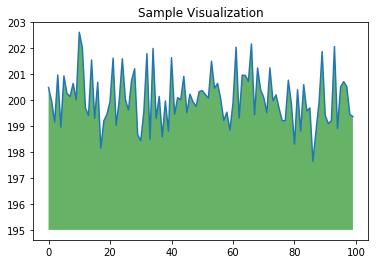

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

Google Drive 계정에서 스프레드시트를 비롯한 데이터를 Colab 메모장으로 가져오거나 GitHub 등의 여러 다른 소스에서 데이터를 가져올 수 있습니다. Colab을 데이터 과학에 활용하는 방법과 데이터 가져오기에 관해 자세히 알아보려면 <a href="#working-with-data">데이터 사용하기</a> 아래 링크를 참조하세요.

## 머신러닝

Colab을 사용하면 <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">코드 몇 줄</a>만으로 이미지 데이터세트를 가져오고, 이 데이터세트로 이미지 분류기를 학습시키며, 모델을 평가할 수 있습니다. Colab 메모장은 Google 클라우드 서버에서 코드를 실행하므로 사용 중인 컴퓨터의 성능과 관계없이 <a href="#using-accelerated-hardware">GPU 및 TPU</a>를 포함한 Google 하드웨어의 성능을 활용할 수 있습니다. 브라우저만 있으면 사용 가능합니다.

Colab은 다음과 같은 분야의 머신러닝 커뮤니티에서 널리 쓰이고 있습니다.
- TensorFlow 시작하기
- 신경망 개발 및 학습시키기
- TPU로 실험하기
- AI 연구 보급하기
- 튜토리얼 만들기

머신러닝 적용 사례를 보여 주는 Colab 메모장 샘플을 확인하려면 아래 <a href="#machine-learning-examples">머신러닝 예시</a>를 참조하세요.

## 추가 리소스

### Colab에서 메모장 사용하기
- [Colaboratory 개요](/notebooks/basic_features_overview.ipynb)
- [Markdown 가이드](/notebooks/markdown_guide.ipynb)
- [라이브러리 가져오기 및 종속 항목 설치하기](/notebooks/snippets/importing_libraries.ipynb)
- [GitHub에서 노트 저장 및 로드하기](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [대화형 양식](/notebooks/forms.ipynb)
- [대화형 위젯](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [Colab의 TensorFlow 2](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### 데이터로 작업하기
- [데이터 로드: 드라이브, 스프레드시트, Google Cloud Storage](/notebooks/io.ipynb) 
- [차트: 데이터 시각화하기](/notebooks/charts.ipynb)
- [BigQuery 시작하기](/notebooks/bigquery.ipynb)

### 머신러닝 단기집중과정
다음은 Google 온라인 머신러닝 과정에서 가져온 일부 메모장입니다. <a href="https://developers.google.com/machine-learning/crash-course/">전체 과정 웹사이트</a>에서 자세한 내용을 확인하세요.
- [Pandas DataFrame 소개](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [합성 데이터를 사용하는 tf.keras 선형 회귀](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### 가속 하드웨어 사용하기
- [GPU를 사용한 TensorFlow](/notebooks/gpu.ipynb)
- [TPU를 사용한 TensorFlow](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

### 추천 예시

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>: Nvidia의 NeMo 대화형 AI 툴킷을 사용하여 오디오 파일의 음성을 컴퓨터에서 생성된 음성으로 변환하세요.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">이미지 분류기 재훈련</a>: 사전에 훈련된 이미지 분류기를 기반으로 꽃을 분류하기 위한 Keras 모델을 구축합니다.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">텍스트 분류</a>: IMDB 영화 리뷰를 <em>긍정적인 리뷰</em> 또는 <em>부정적인 리뷰</em>로 분류합니다.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">스타일 트랜스퍼</a>: 딥 러닝을 사용하여 이미지 간에 스타일을 전이시킵니다.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: 머신러닝 모델을 사용하여 SQuAD 데이터 세트의 질문에 답변합니다.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">동영상 보간 유형</a>: 동영상에서 첫 프레임과 마지막 프레임 사이에 발생한 내용을 예측합니다.
